# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# READ IN EXCEL FILE & VIEW TOP 5 ROWS

In [2]:
df = pd.read_excel('boston_housing_data.xlsx') 
df.head(5)

,locationid,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,date_appraised,locationzone,locationdistrict
0,101,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,NaN,296,15.3,4.98,24.0,2016-03-27,N3,N
1,102,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,NaN,242,17.8,9.14,21.6,2016-03-28,B2,B
2,103,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,4.03,34.7,2016-03-27,G3,G
3,104,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,NaN,222,18.7,2.94,33.4,2016-03-26,D2,D
4,105,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,5.33,36.2,2016-03-28,M3,M


In [3]:
df = pd.read_csv('mtcars.csv') 
df.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
cars = pd.read_csv('mtcars.csv',index_col=0)
cars = cars[['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']]
cars.head()


,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2


In [5]:
cars_normalized=(cars-cars.mean())/cars.std()
pca = PCA(n_components=cars.shape[1])

In [6]:
pca.fit(cars_normalized)
cars_pca = pd.DataFrame(pca.transform(cars_normalized),     
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

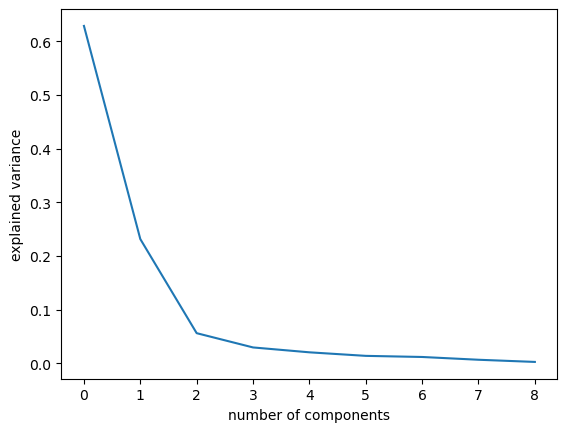

In [7]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [8]:
cov_matrix = np.dot(cars_normalized.T, cars_normalized) / cars.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

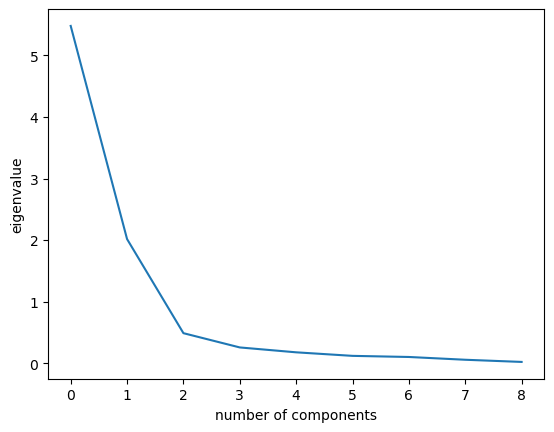

In [9]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [10]:
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],
     index=cars.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
mpg,0.393148,0.027539,-0.221193,-0.006126,0.320762,0.720156,-0.381381,-0.124660,0.114929
cyl,-0.402554,0.015710,-0.252316,0.040700,-0.117140,0.224325,-0.158933,0.810322,0.162663
disp,-0.397353,-0.088885,-0.078251,0.339494,0.486785,-0.019675,-0.182331,-0.064167,-0.661908
hp,-0.367081,0.269414,-0.017212,0.068301,0.294732,0.353942,0.696208,-0.165740,0.251773
drat,0.311817,0.341653,0.149955,0.845658,-0.161926,-0.015368,0.047680,0.135051,0.038091
wt,-0.373477,-0.171943,0.453734,0.191260,0.187482,-0.083772,-0.427776,-0.198394,0.569188
qsec,0.224351,-0.484044,0.628128,-0.030329,0.148250,0.257529,0.276226,0.356133,-0.168737
gear,0.209475,0.550783,0.206584,-0.282382,0.562486,-0.322982,-0.085557,0.316365,0.047197
carb,-0.244581,0.484313,0.464121,-0.214492,-0.399782,0.357069,-0.206042,-0.108328,-0.320459
